In [1]:
import numpy as np
import os
import math
import time
import scipy.io as sio
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import io
from PIL import Image, ImageDraw
from io import BytesIO
%matplotlib inline

In [150]:
# limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 0, 12,13]#reduced joints



def draw_limbs_3d_plt(joints_3d, ax, limb_parents=limb_parents, z_flip = True):
    """
    joints_3d: numpy array of size 17x3
    """
    for i in range(joints_3d.shape[0]):
    
        ax.text(joints_3d[i, 0], joints_3d[i, 1], joints_3d[i, 2], s=str(i))
        
        x_pair = [joints_3d[i, 0], joints_3d[limb_parents[i], 0]]
        y_pair = [joints_3d[i, 1], joints_3d[limb_parents[i], 1]]
        z_pair = [joints_3d[i, 2], joints_3d[limb_parents[i], 2]]
        
        if z_flip:
            ax.plot(z_pair, x_pair, y_pair, linewidth=3, antialiased=True)
        else:
            ax.plot(x_pair, y_pair,z_pair, linewidth=3, antialiased=True)
        
        dist = np.sqrt(np.square(x_pair[0]-x_pair[1]) + np.square(y_pair[0]-y_pair[1]) \
                                                       + np.square(z_pair[0]-z_pair[1]))
        # uncomment to print distance between limbs
        # print ("distance ", i, "<->", limb_parents[i], " = ", dist)


def get_skeleton_plot(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):

    draw_limbs_3d_plt(joints_3d, ax, limb_parents, z_flip=False)
    plt.title(title)


def plot_skeleton(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
    
    get_skeleton_plot(joints_3d, ax, limb_parents, title, z_flip=z_flip)


def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):

    ax = fig.add_subplot(subplot, projection='3d')
    lim_max_x = np.amax(joints_3d[:, 0])
    lim_min_x = np.amin(joints_3d[:, 0])
    lim_max_y = np.amax(joints_3d[:, 1])
    lim_min_y = np.amin(joints_3d[:, 1])
    lim_max_z = np.amax(joints_3d[:, 2])
    lim_min_z = np.amin(joints_3d[:, 2])

    ax.view_init(azim=az, elev=ele)
    
    ax.set_xlim(lim_min_x-1.0, lim_max_x+1.0)
    ax.set_ylim(lim_min_y-1.0, lim_max_y+1.0)
    ax.set_zlim(lim_min_z-1.0, lim_max_z+1.0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    grid_off = False
    
    if grid_off:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_zlabel('')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.get_xaxis().set_ticklabels([])
        ax.get_yaxis().set_ticklabels([])
        ax.set_zticklabels([])
        
        # white panes
        white = (1.0, 1.0, 1.0, 0.0)
        ax.w_xaxis.set_pane_color(white)
        ax.w_yaxis.set_pane_color(white)
        ax.w_zaxis.set_pane_color(white)
        
        # Get rid of the lines in 3d
        ax.w_xaxis.line.set_color(white)
        ax.w_yaxis.line.set_color(white)
        ax.w_zaxis.line.set_color(white)
    
    return ax

def vis_3d(skeleton_3d):
    
    fig = plt.figure(frameon=False, figsize=(10, 10))
    ax = get_ax(skeleton_3d, fig, az=0, subplot='121')
    plot_skeleton(skeleton_3d, ax, z_flip=False)
    ax.set_title("pred_3d_front_view")

    # uncomment to plot side view
    ax = get_ax(skeleton_3d, fig, az=60, ele=10, subplot='122')
    plot_skeleton(skeleton_3d, ax, z_flip=False)
    ax.set_title("pred_3d_side_view")
    
    ax = fig.add_subplot(subplot='133')

    return fig

def skeleton_to_image(skltn):
    '''
    skltn: batch of 3d skeletons. size bx17x3
    '''
    fig = vis_3d(skltn)
    fig.savefig("skeleton_3d.png")   # save the plot
    # plt.close(fig)                 # don't display the plot

In [151]:
data_path = '/data/vcl/anirudh_rule_based/codes_2020/vneck/split_all_data/corrected_humaneva_train_data_center_crops_15j_vneck.mat'
k =  sio.loadmat(data_path)
r = np.random.choice(np.arange(len(k['images_path'])))
images_path = k['images_path'][r]
poses_3d = k['poses_3d'][r]


(15, 3)


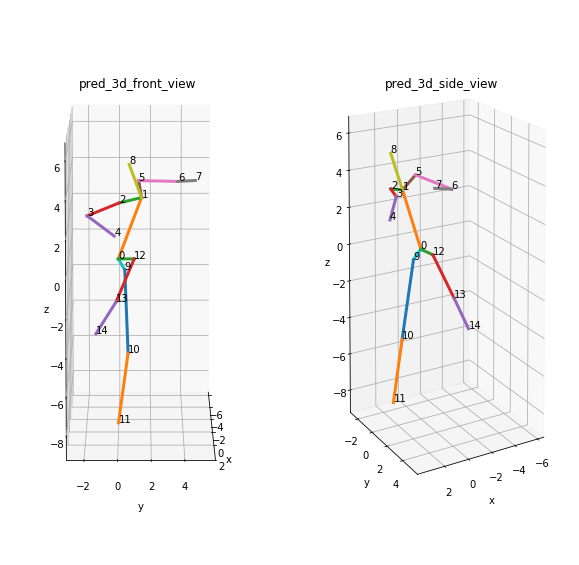

In [152]:
print (poses_3d.shape)

skeleton_images = skeleton_to_image(np.array(poses_3d))


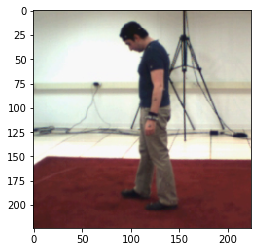

In [149]:
plt.imshow(mpimg.imread(images_path.strip()));